# Getting started
We start out by loading an image, in this case the lighthouse
from [*TestImages.jl*](https://testimages.juliaimages.org).

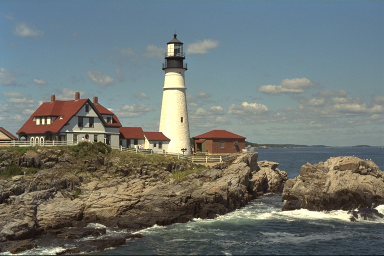

In [1]:
using DitherPunk
using Images
using TestImages

img = testimage("lighthouse")
img = imresize(img; ratio=1//2)

To apply binary dithering, we also need to convert the image to grayscale.

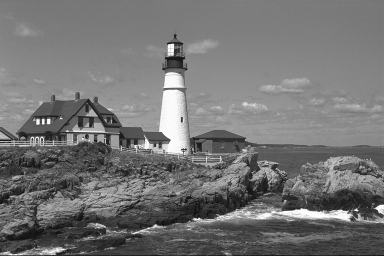

In [2]:
img_gray = Gray.(img)

!!! note " Preprocessing"
    Sharpening the image and adjusting the contrast can emphasize the effect of the algorithms. It is highly recommended to play around with algorithms such as those provided by [ImageContrastAdjustment.jl](https://juliaimages.org/ImageContrastAdjustment.jl/stable/)

## Binary dithering
Since we already turned the image to grayscale, we are ready to apply Bayer dithering,
an [ordered dithering](https://en.wikipedia.org/wiki/Ordered_dithering) algorithm that leads to characteristic cross-hatch patterns.

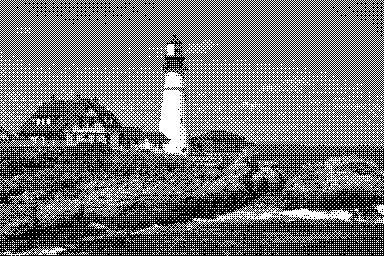

In [3]:
dither(img_gray, Bayer())

### Color spaces
Depending on the method, dithering in sRGB color space can lead to results that are too bright.
To obtain a dithered image that more closely matches the human perception of brightness, grayscale images can be converted to linear color space using the boolean keyword argument `to_linear`.

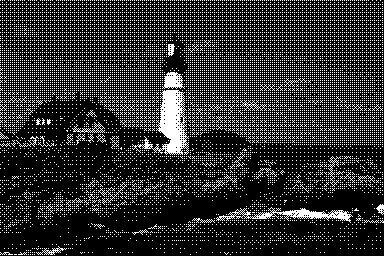

In [4]:
dither(img_gray, Bayer(); to_linear=true)

## Separate-space dithering
All dithering algorithms in DitherPunk can also be applied to color images
and will automatically apply channel-wise binary dithering.

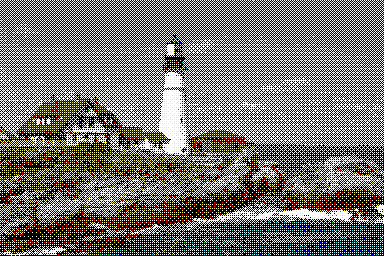

In [5]:
dither(img, Bayer())

!!! note
    Because the algorithm is applied once per channel, the output of this algorithm depends on the color type of input image. `RGB` is recommended, but feel free to experiment!

## Dithering with custom colors
Let's assume we want to recreate an image by stacking a bunch of Rubik's cubes. Dithering algorithms are perfect for this task!
We start out by defining a custom color scheme:

In [6]:
white = RGB{Float32}(1, 1, 1)
yellow = RGB{Float32}(1, 1, 0)
green = RGB{Float32}(0, 0.5, 0)
orange = RGB{Float32}(1, 0.5, 0)
red = RGB{Float32}(1, 0, 0)
blue = RGB{Float32}(0, 0, 1)

rubiks_colors = [white, yellow, green, orange, red, blue]

Currently, dithering in custom colors is limited to `ErrorDiffusion` algorithms such as `FloydSteinberg`.

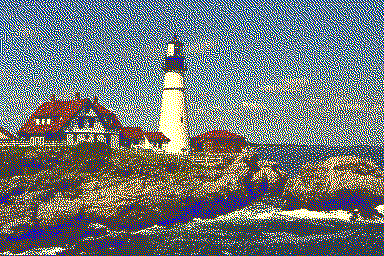

In [7]:
d = dither(img, FloydSteinberg(), rubiks_colors)

this looks much better than simply quantizing to the closest color!

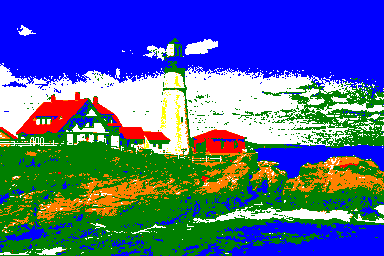

In [8]:
d = dither(img, ClosestColor(), rubiks_colors)

For an overview of all error diffusion algorithms, check out the [gallery].

### ColorSchemes.jl
Predefined color schemes from [ColorSchemes.jl](https://juliagraphics.github.io/ColorSchemes.jl/stable/basics/#Pre-defined-schemes) can also be used.

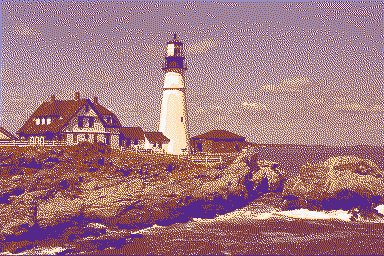

In [9]:
using ColorSchemes

dither(img, FloydSteinberg(), ColorSchemes.PuOr_7)

You can also directly use the corresponding symbol from the
[ColorSchemes catalogue](https://juliagraphics.github.io/ColorSchemes.jl/stable/catalogue/):

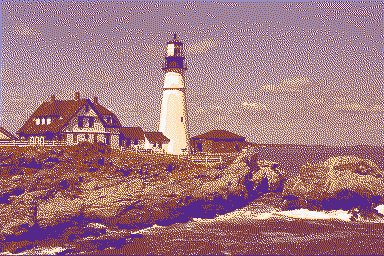

In [10]:
dither(img, FloydSteinberg(), :PuOr_7)

### Clustering.jl
Using [Clustering.jl](https://github.com/JuliaStats/Clustering.jl) allows you to generate
optimized color schemes. Simply pass the size of the desired color palette:

┌ Warning: Replacing docs for `DitherPunk.dither! :: Union{}` in module `DitherPunk`
└ @ Base.Docs docs/Docs.jl:240
┌ Warning: Replacing docs for `DitherPunk.dither :: Union{}` in module `DitherPunk`
└ @ Base.Docs docs/Docs.jl:240
┌ Warning: The clustering cost increased at iteration #26
└ @ Clustering ~/.julia/packages/Clustering/tt9vc/src/kmeans.jl:188
┌ Warning: The clustering cost increased at iteration #28
└ @ Clustering ~/.julia/packages/Clustering/tt9vc/src/kmeans.jl:188


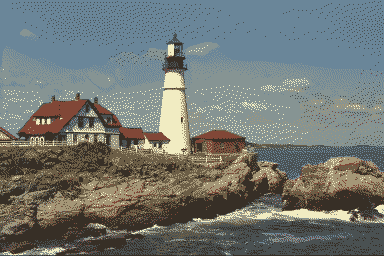

In [11]:
using Clustering

dither(img, FloydSteinberg(), 8)

## UnicodePlots.jl
Using [UnicodePlots.jl](https://github.com/JuliaPlots/UnicodePlots.jl), it is also possible
to dither images directly to Braille-characters using `braille`. The interface is the same
as for binary dithering with `dither`:

In [12]:
using UnicodePlots
img = imresize(img; ratio=1//3)

braille(img, FloydSteinberg())

⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀
⠀⢔⢔⢔⢔⢔⠔⡔⢔⢔⠔⡔⢔⢔⠔⡔⢔⢔⢔⢔⢔⢔⢔⢔⢔⢔⢔⢔⢔⢔⢔⢔⢔⢔⢔⢔⢔⢔⢔⢔⢔⢔⢔⢔⢔⢔⢔⢔⢔⢔⢔⢔⢔⢔⢔⢔⢔⢔⢔⢔⢔⢔⢔⢔⢔⠀
⠀⢕⢕⢕⢜⢔⢕⢕⢕⢕⢕⢕⢕⠕⡕⡕⡕⡕⡜⡔⡕⡜⡔⡕⡜⡔⡕⡅⡇⡕⡕⡅⡇⡕⡕⡕⢕⢕⢕⢕⢕⢕⢕⢕⢕⢕⢕⢕⠕⡕⡱⣑⢅⢇⢕⢕⢅⢇⢎⢆⢇⢎⢆⢇⢎⠀
⠀⢕⢕⢕⢕⡕⡕⡕⡕⡕⡜⡔⡕⡕⡕⡜⡜⡌⡎⡎⡪⡪⡪⡪⢪⢪⠪⡪⡪⡪⡪⡪⡪⡪⡪⡪⡪⡪⡢⡣⡣⡪⡒⡕⡕⡕⡜⡔⡝⡜⡜⡔⡕⡕⡕⡕⡕⡕⡕⢕⢕⢕⢱⢡⢣⠀
⠀⢕⢕⢕⢕⢕⢕⢕⢕⢕⢕⢕⢕⢕⢕⢕⢕⢕⢕⢕⢕⢕⢕⢜⢜⢜⢜⢜⢜⠬⠰⢱⢱⢱⢱⡱⡱⡱⡱⡱⡱⡱⡱⡱⡱⡱⡱⡱⡱⡱⡱⡱⡱⡱⡱⡱⡱⡱⡸⡱⡡⡣⡣⡣⡣⠀
⠀⡕⣕⢕⢕⡕⣕⢕⢕⢕⢕⢕⢕⢕⢕⢕⢕⢕⢕⢕⢕⢕⢕⢕⢕⢕⢵⢱⢕⣿⠨⠸⡜⡮⡣⡫⡪⡣⡣⡣⡣⡣⡣⣣⢣⢣⢣⢣⢣⢣⢣⢣⢣⢣⢣⢣⢣⢣⢣⢣⢣⢣⢣⢣⢪⠀
⠀⢎⢎⢎⢇⢇⢇⢇⢗⢕⢕⢕⢕⢕⢕⢕⢕⢕⢕⢕⢕⢕⢕⢕⢕⢇⢇⢇⠇⠄⢂⠡⡣⡣⡳⡹⡸⡪⡺⡸⡱⡹⡸⡸⡸⡱⡱⡣⡳⡱⡕⡕⡇⡧⣓⢕⢕⢕⢕⢕⢕⢕⢕⢕⢕⠀
⠀⡝⡎⡇⡗⡕⡇⡗⣕⢵⢹⢸⡱⢕⢇⢗⢕⢇⢗⡕⡇⡗⡝⡜⣕⢕⡝⣜⢼⣾⣶⡑⡝⡜⣎⢮⢺⢸⢪⢺⢸⡱⡹⣸⢱⢹⢸⢪⡪⡎⡮⡺⡸⣸⢸⢸⢪⢣⢣⢳⢱⢱⡱⡱⡱⠀
⠀⡎⡮⡣⣫⢪⢎⡇⡧⡣⡳⡱⡕⣇⢗⢝⡜⡕⣇⢧⢳⢱⢣⡫⣪⢪⢎⢮⣺⣟⣟⢇⢏⢮⢪⡪⡎⣇⢏⡎⣇⢧⢫⡪⡎⣗⢽⡸⣪⢫⢎⡏⡇⣇⢇⢗⢕⢵⢱⢣⢳⢱⢱⡱⢭⠀
⠀⡇⡯⡺⡜⡎⣇⢧⢳⢩⠚⢎⠧⡣⢊⠃⢇⢫⡪⣎⢮⢳⡱⣕⢕⢧⢫⢎⣿⣿⡿⡧⡳⡕⣝⢜⡜⣎⢇⢗⢵⣱⡣⣣⡫⡪⡎⡮⡪⡎⡮⡪⡺⣸⡸⡱⡱⡵⡱⡕⡵⡱⡕⡕⣕⠀
⠀⡇⣗⢝⡜⡵⡕⢕⠡⡂⢅⠕⢌⠢⡑⢌⣆⠡⢑⠣⡳⡳⣹⡸⡱⡝⣎⢗⣿⣿⣿⢯⢚⠮⡮⣣⢫⢺⢪⡫⢮⡪⡺⡕⣝⢵⢹⢪⡣⣫⢪⢎⢇⢗⢜⢎⢇⡏⡎⡏⡞⡕⡵⡹⡜⠀
⠀⡝⣜⢕⡝⢌⠜⡆⠦⢗⠰⡡⢡⢱⠀⣕⢰⢔⡑⠄⠊⢧⢇⣗⡝⡮⡺⣺⣿⣿⣿⢼⢸⡹⣜⢼⡱⡝⣎⢮⡣⣳⡱⣝⢜⢮⡪⡇⣗⢕⣕⢧⢫⡪⡣⡫⡪⣪⢺⢸⢪⡪⡎⡇⡗⠀
⠀⢮⡘⡪⢈⢂⢕⢘⡨⠐⡁⠌⣔⠍⣭⢊⡇⡻⣊⢪⢪⠂⠅⠢⠨⡑⢍⠪⢻⣿⣿⣯⡣⠳⠱⠑⠅⠍⡊⠕⠹⠸⡜⣎⢗⢵⡱⡝⣜⢎⡖⣕⢇⢗⢝⡜⣝⢜⢎⢇⢧⢣⢫⡪⡎⠀
⠀⢕⠕⢍⠪⡑⠝⡜⡣⡋⢜⢘⠪⢚⠨⡈⠢⠡⢑⠸⢕⡬⡨⣪⠽⢿⢦⢇⢷⣾⣿⢗⡇⡜⢨⠪⡑⢌⠢⡘⡈⣢⢩⢌⠪⢅⠣⡩⡊⡪⢪⠪⡪⠣⡓⢕⠕⢕⠣⡋⠎⢎⠣⡪⠪⠀
⠀⢐⢁⠢⢁⢃⠣⢑⠰⡘⠐⠔⡑⠔⡡⠨⢘⠈⠢⡡⢕⠌⢆⠪⡩⡒⢕⠍⡕⡹⡸⡙⡕⡕⢕⢍⢎⢮⢊⢎⡪⡪⠪⡈⣊⡢⡱⡨⢂⠪⡂⠕⡌⡊⡌⡢⣕⢥⡣⣎⢎⢆

---

*This notebook was generated using [Literate.jl](https://github.com/fredrikekre/Literate.jl).*